# Goods Recommandation by the Tompson Sampling-based AI engine

## Declare Packages tu Use 

In [1]:
using Distributions
using Formatting
using Plots

## Parameter Initialization

In [2]:
println("Thompson Sampling ===========================")

N = 3
means = [0.3, 0.7, 0.5]
probs = zeros(N)
println(typeof(means), typeof(probs))

Thompson Sampling ===========================
Vector{Float64}Vector{Float64}


## Online Training By Thompson Sampling

S is now given by
Int32[2, 22, 2]
F is now given by
Int32[6, 14, 4]


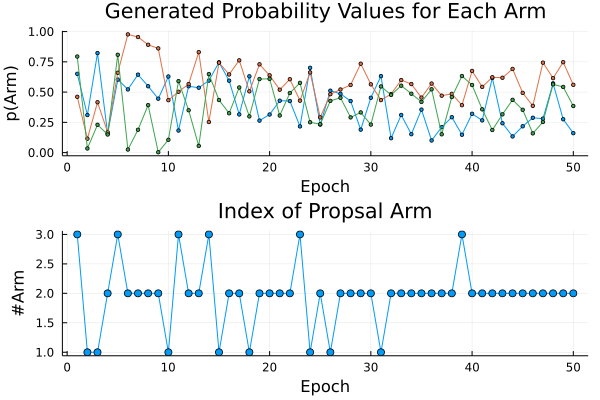

In [3]:
disp = false 
Nepoch = 50
proposal_arm_array = zeros(Nepoch)
probs_array = zeros(Nepoch, N)
S, F = zeros(Int32, N), zeros(Int32, N)
for epoch in range(1, Nepoch)
    for i ∈ range(1, N)
        probs[i] = rand(Beta(S[i]+1,F[i]+1))
    end
    probs_array[epoch,:] = probs
    proposal_arm = argmax(probs)
    proposal_arm_array[epoch] = proposal_arm

    if disp
        println("Trial $(epoch)")
        for prob ∈ probs
            # println("prob: $(prob)")
            printfmt("prob: {:.2f} ", prob)
        end
        println(" => Max arm: $(proposal_arm)")
    end
        
    p = rand(Uniform())
    if p < means[proposal_arm] 
        if disp
            println("++ Success ++") 
        end
        S[proposal_arm] += 1
    else
        if disp
            println(">> Fail <<")
        end
        F[proposal_arm] += 1
    end
end
    
println("S is now given by")
println(S)
println("F is now given by")
println(F)

p1 = plot(probs_array, marker = :circle, markersize = 2, ylabel = "p(Arm)", 
    title = "Generated Probability Values for Each Arm", label = ["Arm 1" "Arm 2" "Arm 3"])
p2 = plot(proposal_arm_array, marker = :circle, ylabel = "#Arm", 
    title = "Index of Propsal Arm", legend = false)

plot(p1, p2, layout = (2,1),  xlabel= "Epoch", legend=false)

## Plotting PDF for Analysis

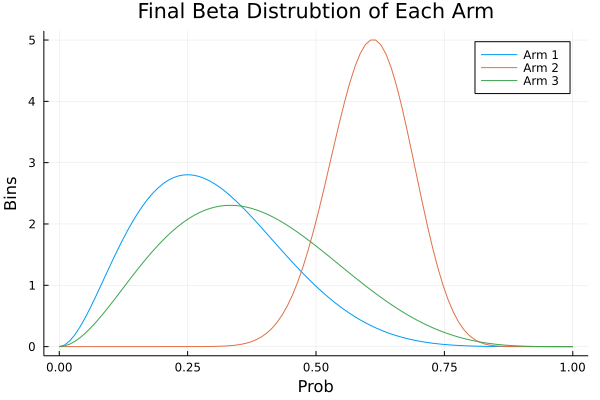

In [4]:
lo, hi = 0., 1.
x = range(lo, hi; length = 100)
Y = []
for i in range(1,N)
    y = pdf.(Beta(S[i]+1,F[i]+1),x)
    if i == 1
        Y = y
    else
        Y = [Y y]
    end
end

plot(x, Y, xlabel = "Prob", ylabel = "Bins", title = "Final Beta Distrubtion of Each Arm", 
    label = ["Arm 1" "Arm 2" "Arm 3"])